In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import rankdata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:


data = pd.read_csv('peru.csv')


print(data.head())


columnas_nonum = data.select_dtypes(exclude=['number']).columns
num_data = data.drop(columns=columnas_nonum)

imputer = SimpleImputer(strategy='mean')
num_data_imputed = imputer.fit_transform(num_data)

# escalado
scaler = StandardScaler()
scaled_data_imputed = scaler.fit_transform(num_data_imputed)

print(scaled_data_imputed)


   Concentración de colágeno (Scl2-SpyTag) en uM  \
0                                            0.5   
1                                            1.0   
2                                            1.5   
3                                            2.0   
4                                            2.5   

   Concentración de elastina (ELP-SpyCatcher) en uM  \
0                                               2.5   
1                                               2.0   
2                                               1.5   
3                                               1.0   
4                                               0.5   

   % de producto (eficiencia de bioconjugación)  
0                                         11.87  
1                                         23.55  
2                                         31.89  
3                                         37.94  
4                                         36.95  
Datos escalados e imputados:
[[-1.25398646 -0.11913223 -

In [ ]:
#outliers utilizando Z-score
z_scores = np.abs(stats.zscore(scaled_data_imputed))
threshold = 3
outliers = np.where(z_scores > threshold)

#remover outliers
filtered_data = scaled_data_imputed[(z_scores < threshold).all(axis=1)]

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(filtered_data)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

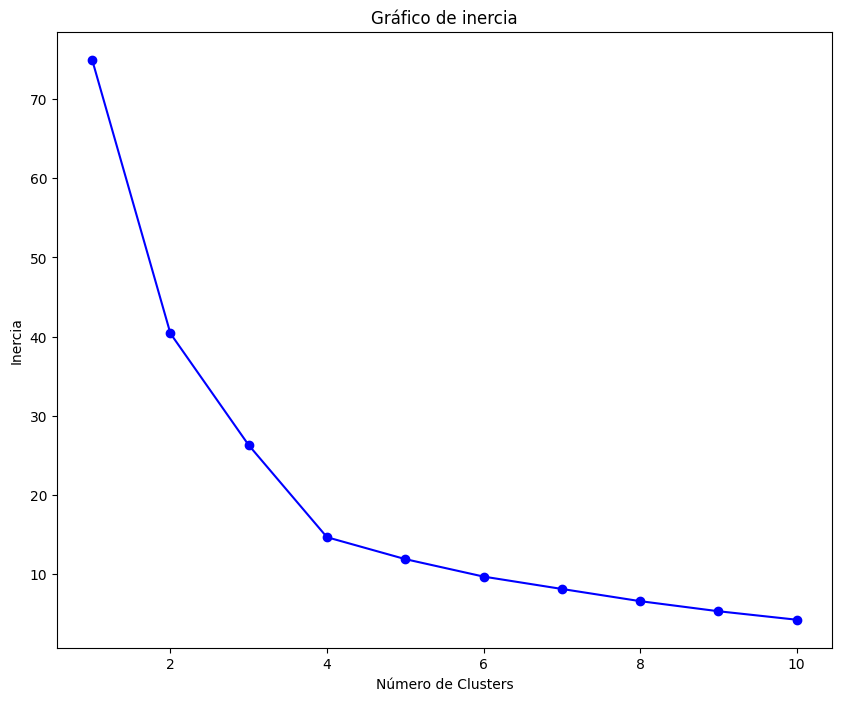

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Gráfico de inercia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

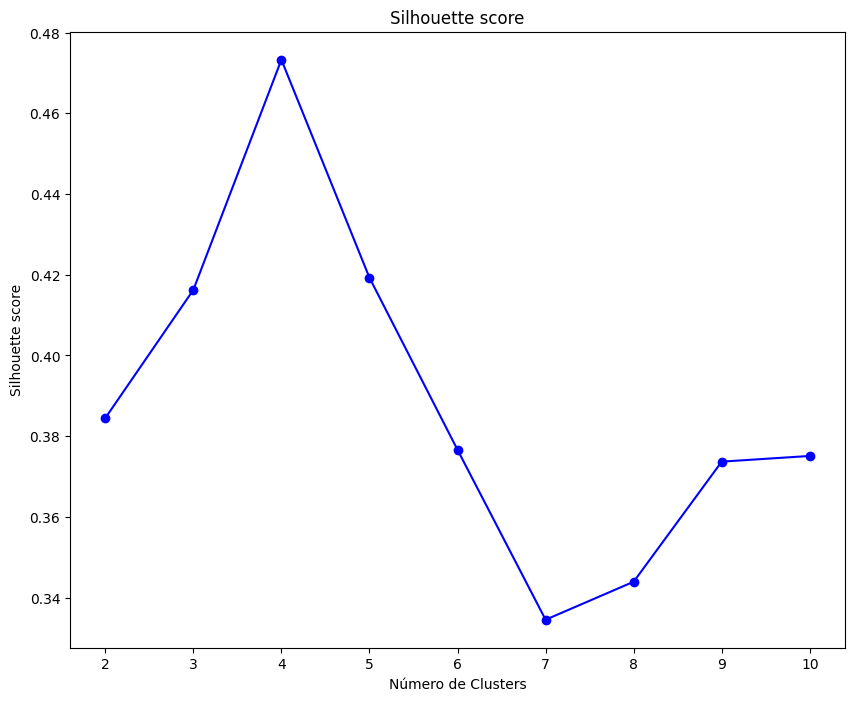

In [ ]:
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(filtered_data)
    score = silhouette_score(filtered_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 8))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')
plt.show()


In [ ]:
n_clusters =4 # numero de clusters a utilizar
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(filtered_data)

In [ ]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(filtered_data)
data_2d_with_clusters = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
data_2d_with_clusters['Cluster'] = kmeans.labels_

In [ ]:
plt.figure(figsize=(10, 8))
palette = sns.color_palette("viridis", as_cmap=False, n_colors=8)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_2d_with_clusters, palette=palette, s=100, alpha=0.7)
plt.title('Visualización de clusters')
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [ ]:
total_samples =100 # numero de muestras deseadas
num_samples_por_cluster = total_samples // 4

#generar datos sinteticos
sint_data = []

for i in range(3):
    cluster_data = filtered_data[kmeans.labels_ == i]
    cluster_mean = cluster_data.mean(axis=0)
    cluster_cov = np.cov(cluster_data, rowvar=False)
    sint_samples = np.random.multivariate_normal(cluster_mean, cluster_cov, num_samples_por_cluster)
    sint_data.append(sint_samples)

sint_data = np.vstack(sint_data)


sint_data_descaled = scaler.inverse_transform(sint_data)

# cambiar valores negativos a 0
sint_data_descaled[sint_data_descaled < 0] = 0

# crear un dataframe con los datos sinteticos
sint_df = pd.DataFrame(sint_data_descaled, columns=num_data.columns)

print(sint_df)


sint_df.to_csv('data_sintetica.csv', index=False)

    Concentración de colágeno (Scl2-SpyTag) en uM  \
0                                       23.573204   
1                                       21.721453   
2                                       17.689990   
3                                       36.117278   
4                                       21.160214   
..                                            ...   
94                                      53.747799   
95                                      69.844139   
96                                      62.912431   
97                                      38.899562   
98                                      48.536396   

    Concentración de elastina (ELP-SpyCatcher) en uM  \
0                                          14.472197   
1                                          63.819463   
2                                          55.349646   
3                                          40.117793   
4                                          47.241572   
..                         

In [ ]:
sint_df = pd.DataFrame(sint_df, columns=num_data.columns)
sint_df.to_csv('data_sintetica.csv', index=False)
print(sint_df.head())

data = pd.read_csv('peru.csv')

col= list(data.columns)
df_final = pd.concat([data[col], sint_df[col]], axis=0)
df_final.to_csv('data_final.csv', index=False)
print(df_final.head())

   Concentración de colágeno (Scl2-SpyTag) en uM  \
0                                      23.573204   
1                                      21.721453   
2                                      17.689990   
3                                      36.117278   
4                                      21.160214   

   Concentración de elastina (ELP-SpyCatcher) en uM  \
0                                         14.472197   
1                                         63.819463   
2                                         55.349646   
3                                         40.117793   
4                                         47.241572   

   % de producto (eficiencia de bioconjugación)  
0                                     22.711702  
1                                     18.096119  
2                                     11.879255  
3                                     33.514945  
4                                     35.472818  
   Concentración de colágeno (Scl2-SpyTag) en uM  \
0   

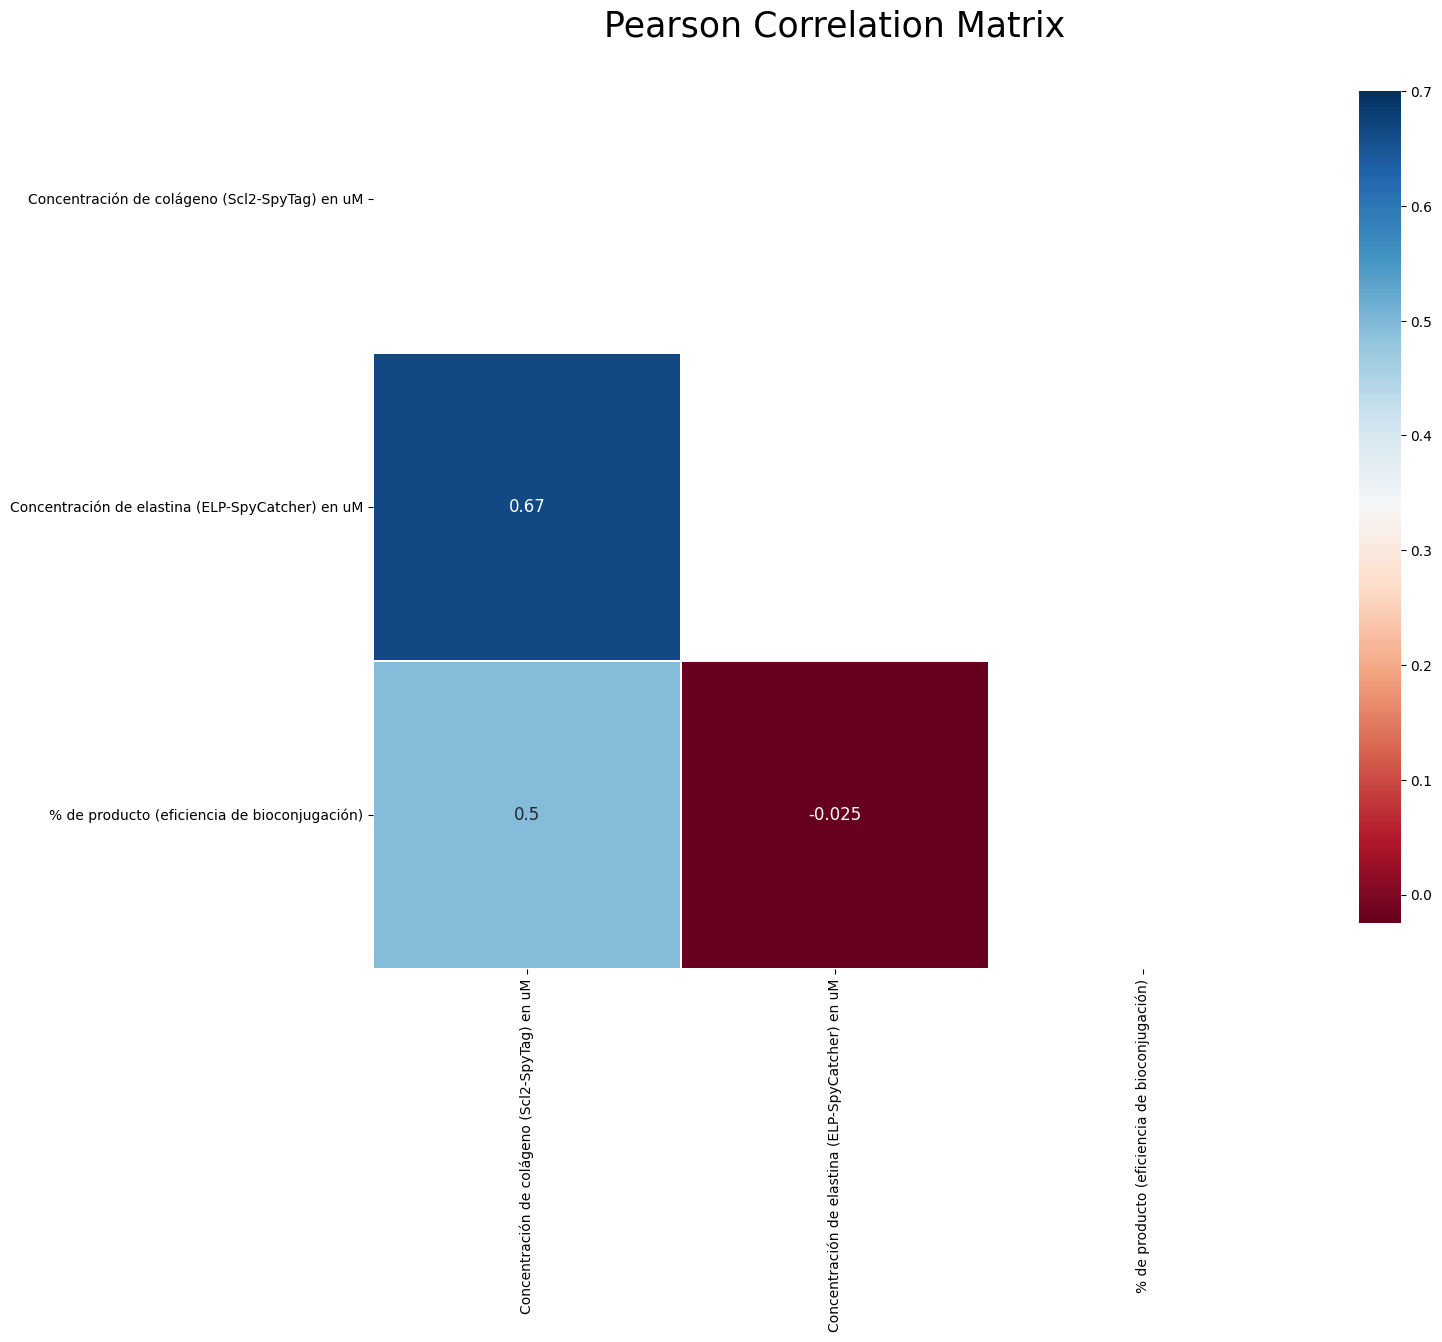

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('data_final.csv')

for col in data.columns:
     data[col] = pd.to_numeric(data[col], errors='coerce')
numerical_data = data.select_dtypes(include=[np.number])

mask = np.zeros_like(numerical_data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(numerical_data.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="RdBu",
            linecolor='w',annot=True,annot_kws={"size":12},mask=mask,cbar_kws={"shrink": .9});

In [ ]:
data = pd.read_csv('data_final.csv')
target_columns = ['Concentración de colágeno (Scl2-SpyTag) en uM', 'Concentración de elastina (ELP-SpyCatcher) en uM']
X = data.drop(columns=target_columns).values
y = data[target_columns].values #variables objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.isnan(y_test).sum())

0


In [ ]:
X_train_numeric = np.where(X_train == '-', np.nan, X_train)
X_train_numeric = X_train_numeric.astype(np.float64)

mask = ~np.isnan(X_train_numeric).any(axis=1)
X_train_numeric = X_train_numeric[mask]
y_train = y_train[mask]
print(np.isnan(X_train_numeric).sum())

0


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') #rellenar valores faltantes en caso de existir con el promedio
X_train_imputed = imputer.fit_transform(X_train_numeric)

X_test_numeric = np.where(X_test == '-', np.nan, X_test)
X_test_numeric = X_test_numeric.astype(np.float64)

X_test_imputed = imputer.transform(X_test_numeric)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=100, max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MSE: 653.03
R2: 0.09


In [ ]:
print(y_pred)
column_names = ['mod_elasticidad_aproximado_Mpsi','Res_max_tension_Mpa']
y_pred_df = pd.DataFrame(data=y_pred, columns=column_names)

# guardar el dataframe en un archivo CSV
y_pred_df.to_csv('resultados_prediccion_clusters.csv', index=False)

[[3.5925666  3.46908733]
 [1.01742316 2.76207626]
 [3.57415047 3.40230475]
 [3.38870489 3.44235271]
 [0.91300468 2.75987229]
 [3.30683961 3.3985067 ]
 [2.6317665  3.09692361]
 [3.61560562 3.55109005]
 [3.57224717 3.39533721]
 [0.7788204  2.76299528]
 [3.35107821 2.65501321]
 [3.60919819 3.57814025]
 [2.70685906 3.12826943]
 [3.58729507 3.45033709]
 [1.78785348 2.81327598]
 [3.50423107 3.16386156]
 [3.50718868 3.17313033]
 [3.43608515 2.94900816]
 [1.39190267 2.77115087]
 [3.39355044 3.44533134]
 [0.36979827 2.79520695]
 [3.38670148 2.78029294]
 [0.34495265 2.79794772]
 [2.32997299 2.97094621]
 [3.59563243 3.47999216]
 [2.89842751 3.20927601]
 [3.06613746 3.28261386]
 [1.08099065 2.76340698]
 [0.43549349 2.7873552 ]
 [3.58927286 3.45737189]
 [3.52421669 3.52565376]
 [3.4596755  3.02423761]
 [2.74605444 3.14463073]
 [3.57697083 3.41262942]
 [3.61372864 3.54435834]
 [3.44668382 2.98393971]
 [3.18338538 3.33404502]
 [1.32610364 2.76853819]
 [3.46327668 3.03551587]
 [3.45401538 3.00668094]


In [ ]:
hidden_layer_configurations = [
    (10),(10,10),(20),(30),(40), (50), (60), (64,32) , (100,), (200,), (300,),
    (100, 50), (200, 100), (300, 150),
    (100, 50, 25), (200, 100, 50), (300, 150, 75), (350,100), (400,100),(500,100),(1000),(1500),(2000), (3000)
]


results = []

for config in hidden_layer_configurations:

    model = MLPRegressor(hidden_layer_sizes=config, activation='relu', max_iter=2000, random_state=42)


    model.fit(X_train_scaled, y_train)


    y_pred = model.predict(X_test_scaled)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    results.append({
        'hidden_layers': config,
        'MSE': mse,
        'R2': r2
    })


results_df = pd.DataFrame(results)


results_df.to_csv('results_clusters.csv', sep=',', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Los resultados han sido guardados en 'results.csv'
